<div style="text-align: center;">
    <div style="background: linear-gradient(to right, #dc3545, #0056b3); padding: 2px; border-radius: 10px; margin: 10px auto; max-width: 1000px; display: inline-block;">
        <div style="background: white; padding: 20px; border-radius: 8px;">
            <h1 style="color: #343a40; text-align: center; margin-bottom: 10px; font-size: 2.5em;">
                🫀 Indicators of Heart Disease
            </h1>
            <div style="text-align: center; background-color: #f7f7f7; padding: 20px; border-radius: 10px; margin-top: 20px;">
                🍬 Diabetic &nbsp;&nbsp;&nbsp;&nbsp;
                👥 Age &nbsp;&nbsp;&nbsp;&nbsp;
                ⚖️ BMI &nbsp;&nbsp;&nbsp;&nbsp;
                🏃 Physical Activity &nbsp;&nbsp;&nbsp;&nbsp;
                🚬 Smoking Status &nbsp;&nbsp;&nbsp;&nbsp;
                😴 Sleep Time &nbsp;&nbsp;&nbsp;&nbsp;
            </div>
        </div>
    </div>
</div>

# 0. Veri Seti Hakkında

 * 2022 yılında 400 binden fazla yetişkinin sağlık durumlarına ilişkin CDC yıllık anket verileri

 * CDC, BRFSS (Davranışsal Risk Faktörleri İzleme Sistemi) aracılığıyla, ABD'deki yetişkinlerin sağlık riskleri ve önleyici sağlık uygulamaları hakkında veri toplar. Bu veri, yıllık anketlerle elde edilir ve sağlık politikalarının oluşturulmasında kullanılmaktadır. BRFSS anket verileri ve belgelerine her yıl için erişim sağlanabilir.

 * CDC'ye göre, kalp hastalığı ABD'deki çoğu ırktan insan için (Afrikalı Amerikalılar, Amerikan Yerlileri ve Alaska Yerlileri ve beyazlar) önde gelen bir ölüm nedenidir. Tüm Amerikalıların yaklaşık yarısı (%47) kalp hastalığı için 3 ana risk faktöründen en az 1'ine sahiptir: yüksek tansiyon, yüksek kolesterol ve sigara. Diğer temel göstergeler arasında diyabet durumu, obezite (yüksek BMI), yeterli fiziksel aktivite yapmama veya çok fazla alkol alma yer almaktadır. Kalp hastalığı üzerinde en büyük etkiye sahip olan faktörlerin belirlenmesi ve önlenmesi sağlık hizmetlerinde çok önemlidir. Buna karşılık, bilgi işlemdeki gelişmeler, bir hastanın durumunu tahmin edebilecek verilerdeki “kalıpları” tespit etmek için makine öğrenimi yöntemlerinin uygulanmasına izin vermektedir.



 * Demografik bilgiler (yaş, cinsiyet)
 * Yaşam tarzı faktörleri (sigara kullanımı, fiziksel aktivite)
 * Sağlık göstergeleri (BMI, kan basıncı, kolesterol)
 * Mevcut sağlık durumları (diyabet, astım vb.)


# 1. Problem Tanımı ve İş Hedefi

Sağlık sektöründe faaliyet gösteren şirketimiz için, Kalp hastalığı riskini erken aşamada tespit edip, önleyici sağlık hizmetlerini optimize etmek.

Bu model şu amaçlarla kullanılabilir:

* Hastaneler ve kliniklerde risk değerlendirmesi
* Sigorta şirketleri için risk skorlaması
* Preventif tıp uygulamaları için erken uyarı sistemi
* Telesağlık uygulamalarında ön değerlendirme aracı

# 2.Veri Setinin Hazırlanması

   ## Veri Seti ve Adresi : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data

# 3. Kütüphanelerin Yüklenmesi

In [165]:
import numpy as np                 # Çok boyutlu diziler ve matematiksel işlemler için hızlı hesaplama yapan, bilimsel ve sayısal veri analizi odaklı bir Python kütüphanesidir.

import pandas as pd                # Veri manipülasyonu ve analizi için kullanılan, farklı veri kaynaklarından okuma/yazma yapabilen ve güçlü veri işleme özellikleri sunan bir Python kütüphanesidir.

import matplotlib.pyplot as plt    # Veri görselleştirme için kullanılan, çeşitli grafik tipleri ve özelleştirme seçenekleri sunan temel çizim kütüphanesidir.

import seaborn as sns              # İstatistiksel veri görselleştirme ve analiz için gelişmiş grafikler sunan, hazır temaları ve kolay kullanımı olan bir Python kütüphanesidir.



# 4.Veri Setinin Okunması

In [166]:
df_= pd.read_csv(filepath_or_buffer = "/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv")
df = df_.copy()

# 5.Veri Seti Hakkında Bilgi Edinmek

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [168]:
df.head(5)   # Dataframe in ilk 5 verisini alırız

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [169]:
df.isnull().sum()   # Eksik değer olup olmadığını kontrol edelim

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [170]:
print("Veri Seti Boyutu (Satır, Sütun):", df.shape)   # Verinin boyutunu öğrenmek için

Veri Seti Boyutu (Satır, Sütun): (246022, 40)


# 6. Veri Setinde NaN Değerler Oluşturalım


   ## NaN (Not a Number) ve NULL değerler hakkında temel bilgiler:


### *NaN (Not a Number)*:


#### 1. Sayısal bir değer olması gereken ancak tanımlanamayan değerler
#### 2. Matematiksel işlemlerin sonucunda ortaya çıkabilir (0/0 gibi)
#### 3. Pandas'ta eksik sayısal değerler için kullanılır
#### 4. Bellekte yer kaplar
#### 5. Float tipinde gösterilir


### *NULL*:


#### 1. Bir değerin tamamen boş/tanımsız olduğunu gösterir
#### 2. Herhangi bir bellek alanı kaplamaz
#### 3. Genellikle veritabanlarında kullanılır
#### 4. Hiçbir değer atanmamış durumu temsil eder



In [171]:
# %3 oranında NaN değer atamak için gerekli fonksiyon


import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

# 7. Veri Setini Yeniden İnceleyelim

In [172]:
df.info()  # Veri seti hakkında detaylı bilgilere ulaşabiliriz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      238650 non-null  object 
 1   Sex                        238900 non-null  object 
 2   GeneralHealth              238743 non-null  object 
 3   PhysicalHealthDays         238774 non-null  float64
 4   MentalHealthDays           238760 non-null  float64
 5   LastCheckupTime            238690 non-null  object 
 6   PhysicalActivities         238714 non-null  object 
 7   SleepHours                 238838 non-null  float64
 8   RemovedTeeth               238659 non-null  object 
 9   HadHeartAttack             238853 non-null  object 
 10  HadAngina                  238787 non-null  object 
 11  HadStroke                  238757 non-null  object 
 12  HadAsthma                  238846 non-null  object 
 13  HadSkinCancer              23

In [173]:
df[df['GeneralHealth'].isna()].head()   # NaN değerler içeren örnek satırları görebiliriz

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
20,Alabama,Female,NaN,30.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.52,63.50,27.34,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
24,Alabama,Female,NaN,30.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,"6 or more, but not all",No,...,1.80,104.33,32.08,NaN,No,Yes,Yes,"Yes, received Tdap",No,No
31,Alabama,Female,NaN,30.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,All,No,...,1.65,81.65,29.95,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
36,Alabama,Male,NaN,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,All,No,...,1.83,94.80,28.35,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
40,Alabama,Male,NaN,29.0,15.0,Within past year (anytime less than 12 months ...,Yes,10.0,"6 or more, but not all",No,...,1.75,113.40,36.92,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [174]:
# Veri setindeki eksik değerlerin analizi

  # df.isnull() -> Her bir hücredeki eksik değerleri True/False olarak gösterir
  # .sum() -> Her sütundaki True değerlerin (eksik değerlerin) toplamını verir
  # Sonuç: Her sütundaki toplam eksik değer sayısını gösterir


print("Veri Setindeki Eksik Değerlerin Sütunlara Göre Dağılımı:")
print("-" * 50)
print("Not: 0 değeri eksik değer olmadığını gösterir")
print("-" * 50)
print(df.isnull().sum())

Veri Setindeki Eksik Değerlerin Sütunlara Göre Dağılımı:
--------------------------------------------------
Not: 0 değeri eksik değer olmadığını gösterir
--------------------------------------------------
State                        7372
Sex                          7122
GeneralHealth                7279
PhysicalHealthDays           7248
MentalHealthDays             7262
LastCheckupTime              7332
PhysicalActivities           7308
SleepHours                   7184
RemovedTeeth                 7363
HadHeartAttack               7169
HadAngina                    7235
HadStroke                    7265
HadAsthma                    7176
HadSkinCancer                7108
HadCOPD                      7211
HadDepressiveDisorder        7301
HadKidneyDisease             7284
HadArthritis                 7316
HadDiabetes                  7326
DeafOrHardOfHearing          7430
BlindOrVisionDifficulty      7245
DifficultyConcentrating      7279
DifficultyWalking            7258
DifficultyDre

# 8. Kategorik Değişkenlerin Belirlenmesi


## Değişkenlerin Özellikleri

Veri setindeki değişkenlerin detaylı açıklaması:

1. DEMOGRAFİK ÖZELLİKLER
- State: ABD eyaletleri (örn. Alabama, Alaska, Arizona vb.)
- Sex: Cinsiyet (Male=Erkek, Female=Kadın)
- AgeCategory: Yaş grupları (18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80+)
- RaceEthnicityCategory: Etnik köken grupları (White, Hispanic, Black, Asian, American Indian/Alaskan Native, Other)

2. GENEL SAĞLIK GÖSTERGELERİ
- GeneralHealth: Kişinin genel sağlık durumu değerlendirmesi
  * Excellent: Mükemmel
  * Very Good: Çok iyi
  * Good: İyi
  * Fair: Orta
  * Poor: Kötü
- PhysicalHealthDays: Son 30 günde kaç gün fiziksel sağlık sorunu yaşadığı (0-30 arası)
- MentalHealthDays: Son 30 günde kaç gün ruhsal sağlık sorunu yaşadığı (0-30 arası)
- LastCheckupTime: En son sağlık kontrolü zamanı
  * Within past year: Son 1 yıl içinde
  * Within past 2 years: Son 2 yıl içinde
  * Within past 5 years: Son 5 yıl içinde
  * 5 or more years ago: 5+ yıl önce
  * Never: Hiç
- SleepHours: Ortalama günlük uyku süresi (saat cinsinden)
- BMI: Vücut Kitle İndeksi (kg/m²)
- HeightInMeters: Boy uzunluğu (metre cinsinden)
- WeightInKilograms: Vücut ağırlığı (kilogram cinsinden)

3. SAĞLIK GEÇMİŞİ (Tüm değişkenler Yes/No)
- HadHeartAttack: Kalp krizi geçirme durumu
- HadAngina: Anjin (göğüs ağrısı) geçmişi
- HadStroke: İnme/felç geçmişi
- HadAsthma: Astım hastalığı varlığı
- HadSkinCancer: Cilt kanseri geçmişi
- HadCOPD: Kronik Obstrüktif Akciğer Hastalığı (KOAH) varlığı
- HadDepressiveDisorder: Depresyon tanısı
- HadKidneyDisease: Böbrek hastalığı varlığı
- HadArthritis: Artrit (eklem iltihabı) durumu
- HadDiabetes: Diyabet durumu
  * Yes
  * No
  * Yes, but only during pregnancy (Gestational): Sadece hamilelikte
  * No, pre-diabetes or borderline diabetes: Sınırda diyabet

4. FİZİKSEL ZORLUKLAR (Tüm değişkenler Yes/No)
- DeafOrHardOfHearing: İşitme kaybı veya zorluğu
- BlindOrVisionDifficulty: Görme zorluğu veya körlük
- DifficultyConcentrating: Hafıza veya konsantrasyon problemleri
- DifficultyWalking: Yürüme veya merdiven çıkmada zorluk
- DifficultyDressingBathing: Giyinme veya banyo yapmada zorluk
- DifficultyErrands: Alışveriş gibi günlük işlerde zorluk

5. YAŞAM TARZI FAKTÖRLERİ
- SmokerStatus: Sigara içme durumu
  * Current smoker - now smokes every day
  * Current smoker - now smokes some days
  * Former smoker
  * Never smoked
- ECigaretteUsage: Elektronik sigara kullanımı (Every day/Some days/Not at all)
- AlcoholDrinkers: Alkol tüketim durumu
  * Yes: Erkeklerde haftada 14+, kadınlarda 7+ içki
  * No: Daha az tüketim
- PhysicalActivities: Son 30 günde fiziksel aktivite/egzersiz yapma durumu (Yes/No)

6. SAĞLIK TARAMALARI VE AŞILAR (Tüm değişkenler Yes/No)
- ChestScan: Son 12 ayda akciğer tomografisi çekilme durumu
- HIVTesting: HIV testi yaptırma durumu
- FluVaxLast12: Son 12 ayda grip aşısı olma durumu
- PneumoVaxEver: Hiç zatürre aşısı olma durumu
- TetanusLast10Tdap: Son 10 yılda tetanos aşısı olma durumu
- HighRiskLastYear: Son yılda yüksek riskli davranışlarda bulunma
- CovidPos: COVID-19 pozitif test sonucu alma durumu

Bu veri seti, kalp hastalıkları risk faktörlerini ve genel sağlık durumunu kapsamlı bir şekilde değerlendirmeye olanak sağlayan geniş bir değişken setine sahiptir.

In [176]:
df.dtypes    # Değişken tiplerini görelim

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [177]:
# Kolonları alt alta görmek için:

for col in df.columns:
   print(col)

State
Sex
GeneralHealth
PhysicalHealthDays
MentalHealthDays
LastCheckupTime
PhysicalActivities
SleepHours
RemovedTeeth
HadHeartAttack
HadAngina
HadStroke
HadAsthma
HadSkinCancer
HadCOPD
HadDepressiveDisorder
HadKidneyDisease
HadArthritis
HadDiabetes
DeafOrHardOfHearing
BlindOrVisionDifficulty
DifficultyConcentrating
DifficultyWalking
DifficultyDressingBathing
DifficultyErrands
SmokerStatus
ECigaretteUsage
ChestScan
RaceEthnicityCategory
AgeCategory
HeightInMeters
WeightInKilograms
BMI
AlcoholDrinkers
HIVTesting
FluVaxLast12
PneumoVaxEver
TetanusLast10Tdap
HighRiskLastYear
CovidPos


In [178]:
print(df.columns.tolist())

['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [179]:
# Veri setindeki toplam kolon sayısını bulalım

print("Veri Setindeki Toplam Kolon Sayısı:")
print("-" * 35)
print(len(df.columns))
print("\n")

Veri Setindeki Toplam Kolon Sayısı:
-----------------------------------
40




In [180]:
# Kategorik değişkenleri bulup listeliyoruz ve kaç adet olduğunu yazdırıyoruz
# Kategorik değişkenlerdeki eşsiz(unique) değerleri listeliyoruz


categorical_columns = df.select_dtypes(include=['object']).columns
print("Kategorik Değişkenler ve Unique Değerleri:")
print("-" * 35)
for col in categorical_columns:
   print(f"{col}: {df[col].unique().tolist()}")
print(f"\nToplam Kategorik Değişken Sayısı: {len(categorical_columns)}")

Kategorik Değişkenler ve Unique Değerleri:
-----------------------------------
State: ['Alabama', nan, 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico', 'Virgin Islands']
Sex: ['Female', 'Male', nan]
GeneralHealth: ['Very good', 'Fair', 'Good', 'Excellent', 'Poor', nan]
LastCheckupTime: ['Within past year (anytime less than 12 months ago)', '5 or more years ago', nan, 'Within past 2 years 

In [181]:
# Fonksiyon yazarak kategorik değişken analizi yapalım

# Toplam kolon sayısını
# Kategorik değişkenlerin neler olduğunu
# Her kategorik değişkenin alabileceği değerleri
# Her kategorik değişkenin benzersiz değer sayısını 

def analyze_columns(df):
    
    # Toplam kolon analizi
    print("TOPLAM KOLON ANALİZİ")
    print("-" * 50)
    print(f"Veri setinde toplam {len(df.columns)} kolon bulunmaktadır.")
    print("\n")
    
    # Kategorik değişken analizi
    print("KATEGORİK DEĞİŞKEN ANALİZİ")
    print("-" * 50)
    categorical_columns = df.select_dtypes(include=['object']).columns
    print(f"Veri setinde {len(categorical_columns)} adet kategorik değişken bulunmaktadır.")
    print("\nKategorik Değişkenler ve Benzersiz Değerleri:")
    print("-" * 35)
    for col in categorical_columns:
        print(f"\n{col}:")
        print(f"Benzersiz Değerler: {df[col].unique().tolist()}")
        print(f"Benzersiz Değer Sayısı: {df[col].nunique()}")


analyze_columns(df)  # Fonksiyonu çağırma

TOPLAM KOLON ANALİZİ
--------------------------------------------------
Veri setinde toplam 40 kolon bulunmaktadır.


KATEGORİK DEĞİŞKEN ANALİZİ
--------------------------------------------------
Veri setinde 34 adet kategorik değişken bulunmaktadır.

Kategorik Değişkenler ve Benzersiz Değerleri:
-----------------------------------

State:
Benzersiz Değerler: ['Alabama', nan, 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin

In [183]:
# DATAFRAME OLUŞTURMAK DAHA NET VE ANLAŞILIR GÖRMEMİZİ SAĞLAR, ONUN İÇİN BİR FONKSİYON YAZALIM

def display_column_info(df):
    
    column_info = pd.DataFrame({
        'Kolon Adı': df.columns,
        'Veri Tipi': df.dtypes,
        'Boş Değer Sayısı': df.isnull().sum(),
        'Benzersiz Değer Sayısı': df.nunique(),
        'Örnek Değerler': [df[col].unique()[:3] for col in df.columns]
    })
    
    
    print("\n VERİ SETİ KOLON ANALİZİ")
    print("=" * 100)
    print(f"Toplam Kolon Sayısı: {len(df.columns)}")
    print("=" * 100)
    
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(exclude=['object']).columns
    
    print("\n KATEGORİK KOLONLAR")
    print("-" * 100)
    display(column_info[column_info['Kolon Adı'].isin(categorical_cols)])
    
    print("\n SAYISAL KOLONLAR")
    print("-" * 100)
    display(column_info[column_info['Kolon Adı'].isin(numerical_cols)])

# Fonksiyonu çağırma
display_column_info(df)


 VERİ SETİ KOLON ANALİZİ
Toplam Kolon Sayısı: 40

 KATEGORİK KOLONLAR
----------------------------------------------------------------------------------------------------


,Kolon Adı,Veri Tipi,Boş Değer Sayısı,Benzersiz Değer Sayısı,Örnek Değerler
State,State,object,7372,54,"[Alabama, nan, Alaska]"
Sex,Sex,object,7122,2,"[Female, Male, nan]"
GeneralHealth,GeneralHealth,object,7279,5,"[Very good, Fair, Good]"
LastCheckupTime,LastCheckupTime,object,7332,4,[Within past year (anytime less than 12 months...
PhysicalActivities,PhysicalActivities,object,7308,2,"[Yes, No, nan]"
RemovedTeeth,RemovedTeeth,object,7363,4,"[None of them, 6 or more, but not all, 1 to 5]"
HadHeartAttack,HadHeartAttack,object,7169,2,"[No, Yes, nan]"
HadAngina,HadAngina,object,7235,2,"[No, Yes, nan]"
HadStroke,HadStroke,object,7265,2,"[No, Yes, nan]"
HadAsthma,HadAsthma,object,7176,2,"[No, Yes, nan]"



 SAYISAL KOLONLAR
----------------------------------------------------------------------------------------------------


,Kolon Adı,Veri Tipi,Boş Değer Sayısı,Benzersiz Değer Sayısı,Örnek Değerler
PhysicalHealthDays,PhysicalHealthDays,float64,7248,31,"[4.0, 0.0, 5.0]"
MentalHealthDays,MentalHealthDays,float64,7262,31,"[0.0, 15.0, 4.0]"
SleepHours,SleepHours,float64,7184,23,"[9.0, 6.0, 8.0]"
HeightInMeters,HeightInMeters,float64,7286,99,"[1.6, 1.78, 1.85]"
WeightInKilograms,WeightInKilograms,float64,7303,514,"[71.67, 95.25, 108.86]"
BMI,BMI,float64,7327,3493,"[27.99, 30.13, 31.66]"


# 9. İstatistiksel Analiz


### df.describe()


Sadece sayısal kolonlar için çalışır

8 istatistiksel değer verir:

* count: Veri sayısı
* std: Standart sapma
* min: Minimum değer
* 25%: 1. çeyrek
* 50%: Medyan (2. çeyrek)
* 75%: 3. çeyrek
* max: Maksimum değer
 
### df.describe().T

* Satır ve sütunları yer değiştirir
* Daha okunabilir bir format sunar
* Her değişken bir satırda gösterilir



In [184]:
df.describe()   # Sayısal verimizi istatistiksel olarak görelim

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,238774.000000,238760.000000,238838.000000,238736.000000,238719.000000,238695.000000
mean,4.115364,4.168106,7.021136,1.705115,83.615488,28.668090
std,8.400097,8.103826,1.441341,0.106624,21.325754,6.516332
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.250000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,238774.0,4.115364,8.400097,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,238760.0,4.168106,8.103826,0.00,0.00,0.00,4.00,30.00
SleepHours,238838.0,7.021136,1.441341,1.00,6.00,7.00,8.00,24.00
HeightInMeters,238736.0,1.705115,0.106624,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,238719.0,83.615488,21.325754,28.12,68.04,81.65,95.25,292.57
BMI,238695.0,28.668090,6.516332,12.02,24.25,27.46,31.89,97.65


# 10.Eksik Veri Analizi




In [186]:
# Eksik değerleri belirlemek için DataFrame oluşturalım


eksik_veri = pd.DataFrame({
    'Eksik Değer Sayısı': df.isnull().sum(),
    'Eksik Değer Yüzdesi': (df.isnull().sum() / len(df)) * 100
})

In [187]:
print("Eksik Değer Analizi:")
print(eksik_veri[eksik_veri['Eksik Değer Sayısı'] > 0])

Eksik Değer Analizi:
                           Eksik Değer Sayısı  Eksik Değer Yüzdesi
State                                    7372             2.996480
Sex                                      7122             2.894863
GeneralHealth                            7279             2.958678
PhysicalHealthDays                       7248             2.946078
MentalHealthDays                         7262             2.951769
LastCheckupTime                          7332             2.980221
PhysicalActivities                       7308             2.970466
SleepHours                               7184             2.920064
RemovedTeeth                             7363             2.992822
HadHeartAttack                           7169             2.913967
HadAngina                                7235             2.940794
HadStroke                                7265             2.952988
HadAsthma                                7176             2.916812
HadSkinCancer                            

In [188]:
# Eksik olmayan değerleri analiz edelim


eksiksiz_veri = pd.DataFrame({
    'Toplam Satır Sayısı': len(df),
    'Dolu Değer Sayısı': df.notnull().sum(),
    'Dolu Değer Yüzdesi': (df.notnull().sum() / len(df)) * 100
})

print("Dolu Değer Analizi:")
print(eksiksiz_veri)

Dolu Değer Analizi:
                           Toplam Satır Sayısı  Dolu Değer Sayısı  \
State                                   246022             238650   
Sex                                     246022             238900   
GeneralHealth                           246022             238743   
PhysicalHealthDays                      246022             238774   
MentalHealthDays                        246022             238760   
LastCheckupTime                         246022             238690   
PhysicalActivities                      246022             238714   
SleepHours                              246022             238838   
RemovedTeeth                            246022             238659   
HadHeartAttack                          246022             238853   
HadAngina                               246022             238787   
HadStroke                               246022             238757   
HadAsthma                               246022             238846   
HadSkinCancer 

In [189]:
# Her sütunun veri tipi ve benzersiz değer sayısını görelim

print("\nSütun Bilgileri:")
column_info = pd.DataFrame({
    'Veri Tipi': df.dtypes,
    'Benzersiz Değer Sayısı': df.nunique(),
    'İlk Benzersiz Değerler': [df[col].unique()[:3].tolist() for col in df.columns]
})

print(column_info)


Sütun Bilgileri:
                          Veri Tipi  Benzersiz Değer Sayısı  \
State                        object                      54   
Sex                          object                       2   
GeneralHealth                object                       5   
PhysicalHealthDays          float64                      31   
MentalHealthDays            float64                      31   
LastCheckupTime              object                       4   
PhysicalActivities           object                       2   
SleepHours                  float64                      23   
RemovedTeeth                 object                       4   
HadHeartAttack               object                       2   
HadAngina                    object                       2   
HadStroke                    object                       2   
HadAsthma                    object                       2   
HadSkinCancer                object                       2   
HadCOPD                      object  

In [190]:
# Toplam eksik ve dolu gözlem sayılarını analiz edelim

total_eksik = df.isnull().sum().sum()  # Tüm eksik değerlerin toplamı
total_dolu = df.notnull().sum().sum()  # Tüm dolu değerlerin toplamı
total_hücre = df.size  # Toplam hücre sayısı (satır * sütun)

print(f"Toplam Hücre Sayısı: {total_hücre}")
print(f"Toplam Eksik Gözlem Sayısı: {total_eksik}")
print(f"Toplam Dolu Gözlem Sayısı: {total_dolu}")
print(f"\nEksik Veri Yüzdesi: {(total_eksik/total_hücre)*100:.2f}%")
print(f"Dolu Veri Yüzdesi: {(total_dolu/total_hücre)*100:.2f}%")

Toplam Hücre Sayısı: 9840880
Toplam Eksik Gözlem Sayısı: 290746
Toplam Dolu Gözlem Sayısı: 9550134

Eksik Veri Yüzdesi: 2.95%
Dolu Veri Yüzdesi: 97.05%


In [191]:
# Tüm sayısal değişkenleri bulalım ve eksik olan sayısal değişkenleri analiz edelim

numeric_columns = df_fillna.select_dtypes(include=['int64', 'float64']).columns

print("Veri Setindeki Tüm Sayısal Değişkenler:")
print(numeric_columns.tolist())

print("\nBu Değişkenlerdeki Eksik Değer Sayıları:")
eksik_values = df_fillna[numeric_columns].isnull().sum()
print(eksik_values)

print("\nSadece Eksik Değer İçeren Sayısal Değişkenler:")
print(eksik_values[eksik_values > 0])

Veri Setindeki Tüm Sayısal Değişkenler:
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack_num', 'Chronic_Disease_Count', 'Risk_Score']

Bu Değişkenlerdeki Eksik Değer Sayıları:
PhysicalHealthDays       7248
MentalHealthDays         7262
SleepHours               7184
HeightInMeters           7286
WeightInKilograms        7303
BMI                      7327
HadHeartAttack_num          0
Chronic_Disease_Count       0
Risk_Score                  0
dtype: int64

Sadece Eksik Değer İçeren Sayısal Değişkenler:
PhysicalHealthDays    7248
MentalHealthDays      7262
SleepHours            7184
HeightInMeters        7286
WeightInKilograms     7303
BMI                   7327
dtype: int64


# 11. Eksik Verilerin Silinmesi

In [192]:
# Orjinal veri setinin bir kopyasını oluşturalım

df_fillna = df.copy()

In [193]:
# NaN değerleri silme

df_clean = df_fillna.dropna()

In [194]:
# Silme işlemi sonrası kontrol edelim

print("Orijinal veri seti boyutu:\n", df_fillna.shape) 

print("Temizlenmiş veri seti boyutu:\n", df_clean.shape) 

print("\nKalan eksik değerler:\n", df_clean.isnull().sum())

Orijinal veri seti boyutu:
 (246022, 40)
Temizlenmiş veri seti boyutu:
 (74369, 40)

Kalan eksik değerler:
 State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory   

In [195]:
print("NaN değer sayıları:")
print(df_clean.isnull().sum())

print("\nToplam NaN değer sayısı:", df_clean.isnull().sum().sum())

NaN değer sayıları:
State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms  

# 12. Kategorik Değişken Analizi




**CategoricalDtype** pandas'ta kategorik verilerin sıralı (ordinal) olarak tanımlanmasını sağlayan bir veri tipidir. Özellikle kategorilerin belirli bir sırası/hiyerarşisi olduğunda kullanılır.

CategoricalDtype'ın avantajları:

* Sıralama İmkanı:

Kategoriler arasında karşılaştırma yapabilirsiniz (>, <, >=, <=)
Örnek: 'Good' > 'Fair' karşılaştırması yapılabilir


* Bellek Verimliliği:

 -Kategorik veriler daha az bellek kullanır 
 
 -Tekrar eden string'ler yerine integer kodlar kullanılır


* Veri Analizi Kolaylığı:

 -Sıralı verilerde analiz yapmayı kolaylaştırır
 
 -Görselleştirmelerde doğru sıralamayı korur

In [196]:
# veri tipi işlemi için pandas kütüphanesinden import yapıyoruz

from pandas.api.types import CategoricalDtype


In [198]:
# Kategorik dönüşüm için 

saglik_siralama = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
df_fillna['GeneralHealth'] = df_fillna['GeneralHealth'].astype(CategoricalDtype(categories=saglik_siralama, ordered=True))

In [199]:
# Kontrol

print("GeneralHealth değişkeni tipi:", df_fillna['GeneralHealth'].dtype)
print("\nKategoriler:")
print(df_fillna['GeneralHealth'].cat.categories)

GeneralHealth değişkeni tipi: category

Kategoriler:
Index(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], dtype='object')


<Axes: ylabel='GeneralHealth'>

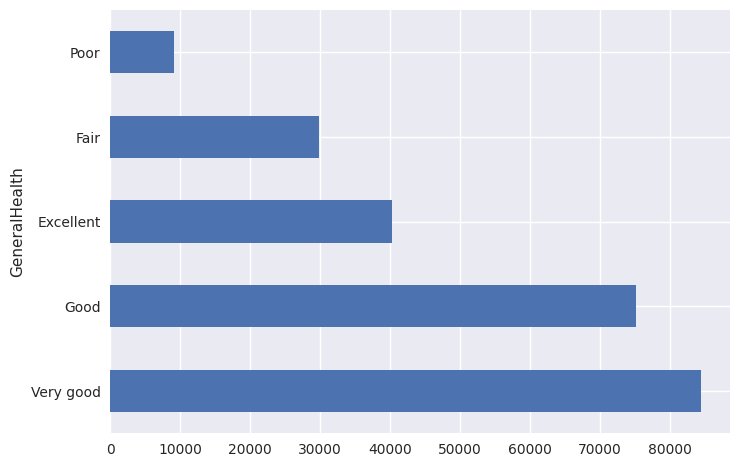

In [200]:
df['GeneralHealth'].value_counts().plot.barh()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


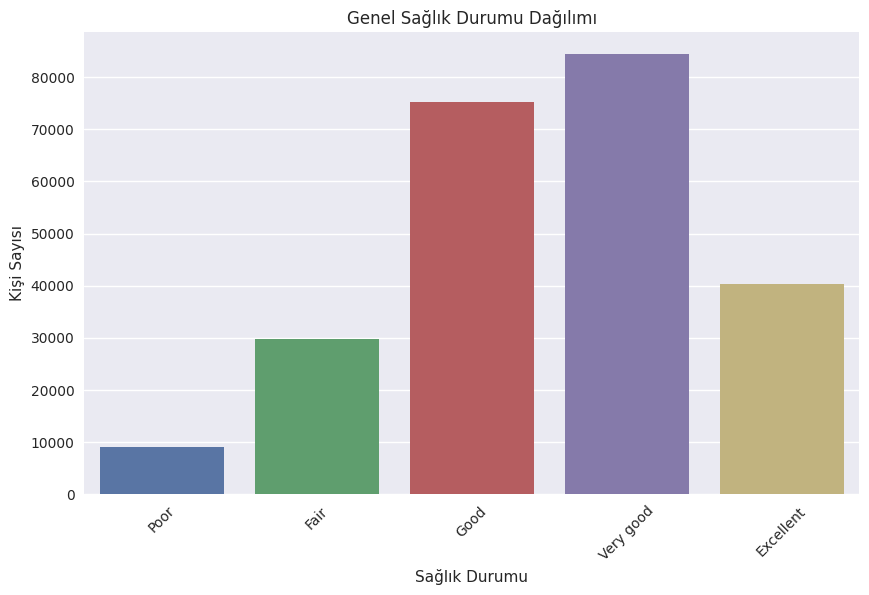

In [201]:
# Genel sağlık durumu görselleşirmesi ile sıralama durumunu görüntüleyelim

plt.figure(figsize=(10, 6))
sns.countplot(data=df_fillna, x='GeneralHealth', order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.title('Genel Sağlık Durumu Dağılımı')
plt.xlabel('Sağlık Durumu')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.show()

In [202]:
# Bazı değişkenleri dönüştürmemiz gerekicek. Özellikle bizim için önemli kriterlerden 'HadHeartAttack' ı binary (0/1) e dönüştürelim.
# Birbirleriyle ilişkili olan değişkenleri karşılaştırmak daha kolay olacak çünkü sayısal verilerle çalışacağız

# HadHeartAttack'ı sayısal formata dönüştürelim (Yes=1, No=0)
df_fillna['HadHeartAttack_num'] = (df_fillna['HadHeartAttack'] == 'Yes').astype(int)

In [203]:
df_fillna['HadHeartAttack_num'].head()

0    0
1    0
2    0
3    0
4    0
Name: HadHeartAttack_num, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Poor'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Very good'),
  Text(4, 0, 'Excellent')])

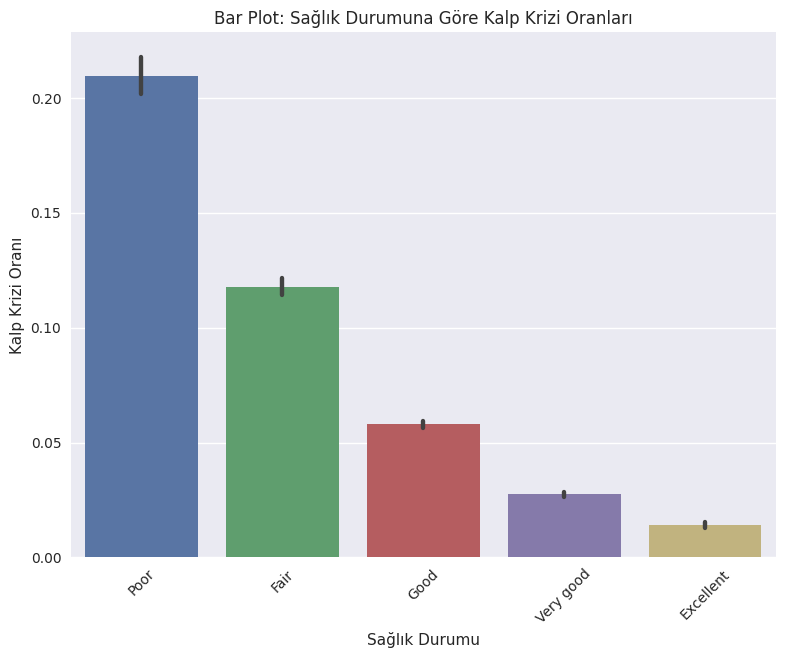

In [204]:
# Sağlık durumuna göre kalp krizi oranlarını analiz edelim

# 1. Bar Plot ile

plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.barplot(data=df_fillna, x='GeneralHealth', y='HadHeartAttack_num', 
            order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.title('Bar Plot: Sağlık Durumuna Göre Kalp Krizi Oranları')
plt.xlabel('Sağlık Durumu')
plt.ylabel('Kalp Krizi Oranı')
plt.xticks(rotation=45)

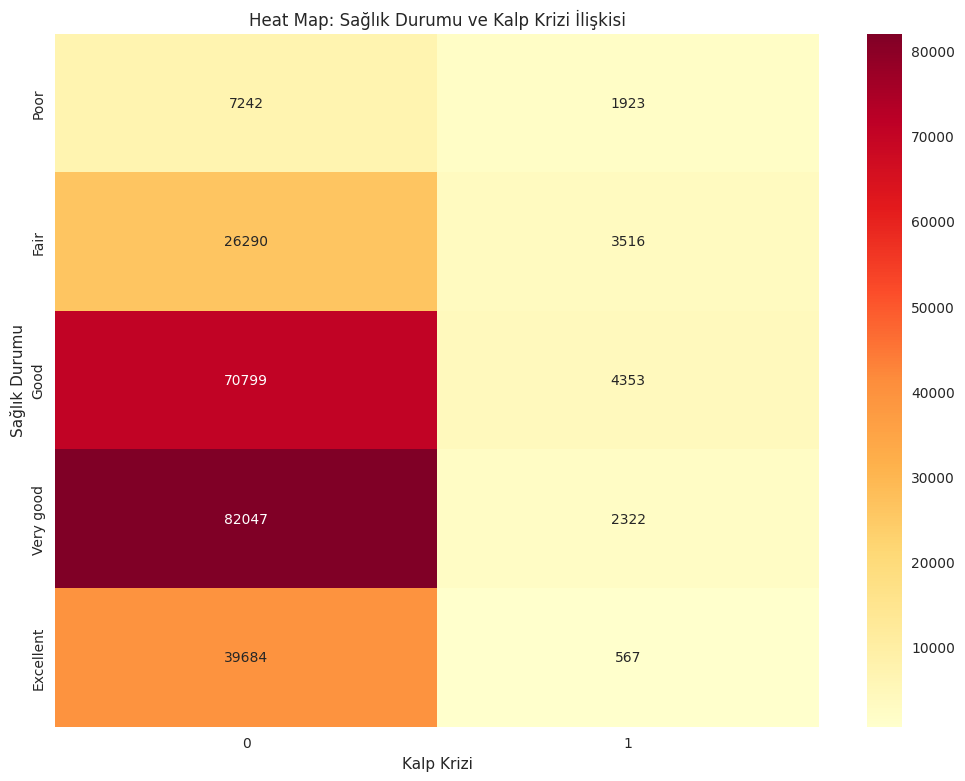

In [205]:
# Sağlık durumu analizine birde pivot ile bakalım

plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 4)
health_heart_pivot = pd.crosstab(df_fillna['GeneralHealth'], df_fillna['HadHeartAttack_num'])
sns.heatmap(health_heart_pivot, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heat Map: Sağlık Durumu ve Kalp Krizi İlişkisi')
plt.xlabel('Kalp Krizi')
plt.ylabel('Sağlık Durumu')

plt.tight_layout()
plt.show()

/tmp/ipykernel_30/2637579228.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_fillna.groupby('GeneralHealth')['HadHeartAttack_num'].mean() * 100).plot(kind='pie', autopct='%1.1f%%')


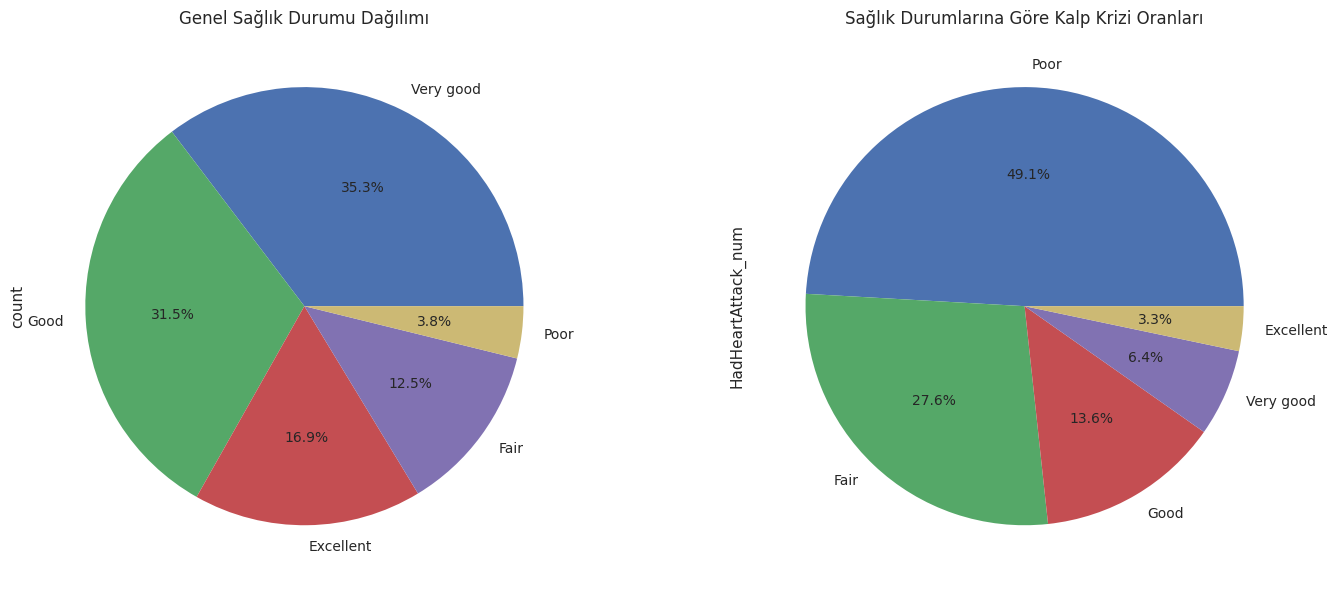

In [206]:
# Pie Charts grafikleri ekleyelim

plt.figure(figsize=(15, 6))

# Genel Sağlık Durumu Dağılımı

plt.subplot(1, 2, 1)
df_fillna['GeneralHealth'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Genel Sağlık Durumu Dağılımı')

# Kalp Krizi Oranları

plt.subplot(1, 2, 2)
(df_fillna.groupby('GeneralHealth')['HadHeartAttack_num'].mean() * 100).plot(kind='pie', autopct='%1.1f%%')
plt.title('Sağlık Durumlarına Göre Kalp Krizi Oranları')

plt.tight_layout()
plt.show()

In [207]:
# Sigara içen ve içmeyen kişilerde kalp krizi durumlarını analiz etmek için önce sigara içenlerin hangi durumda olduklarına bakalım

df_fillna['SmokerStatus'].value_counts()

SmokerStatus
Never smoked                             143375
Former smoker                             66477
Current smoker - now smokes every day     21029
Current smoker - now smokes some days      7860
Name: count, dtype: int64

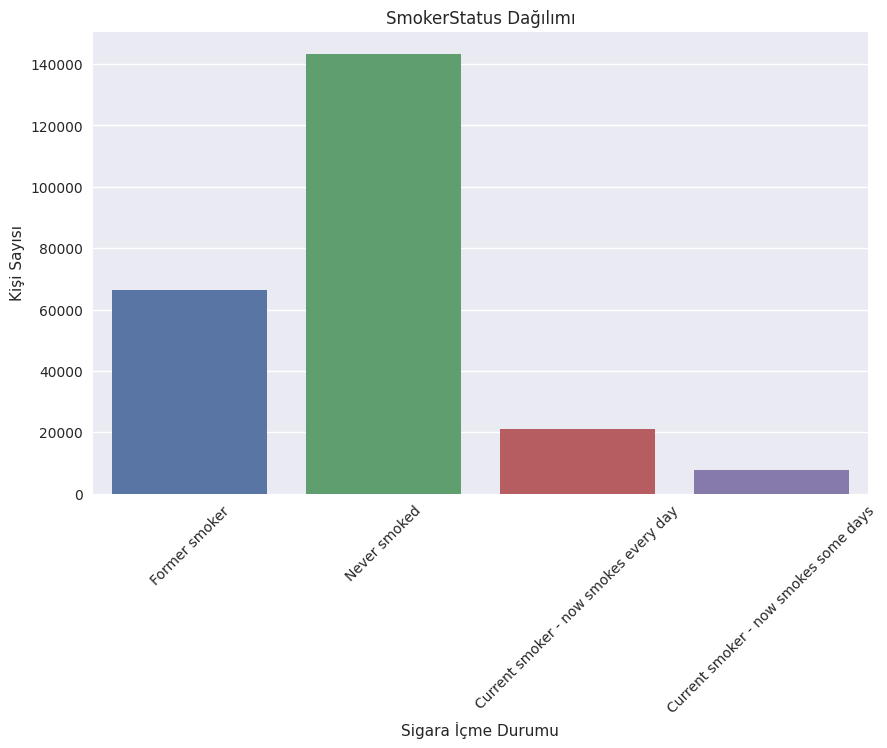

In [208]:
# Sigara içenlerin dağılımlarına bakalım

plt.figure(figsize=(10, 6))
sns.countplot(data=df_fillna, x='SmokerStatus')
plt.title('SmokerStatus Dağılımı')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.show()

In [209]:
# Crosstab oluşturalım

smoker_heart = pd.crosstab(df_fillna['SmokerStatus'], df_fillna['HadHeartAttack_num'])
smoker_heart_pct = pd.crosstab(df_fillna['SmokerStatus'], df_fillna['HadHeartAttack_num'], normalize='index') * 100

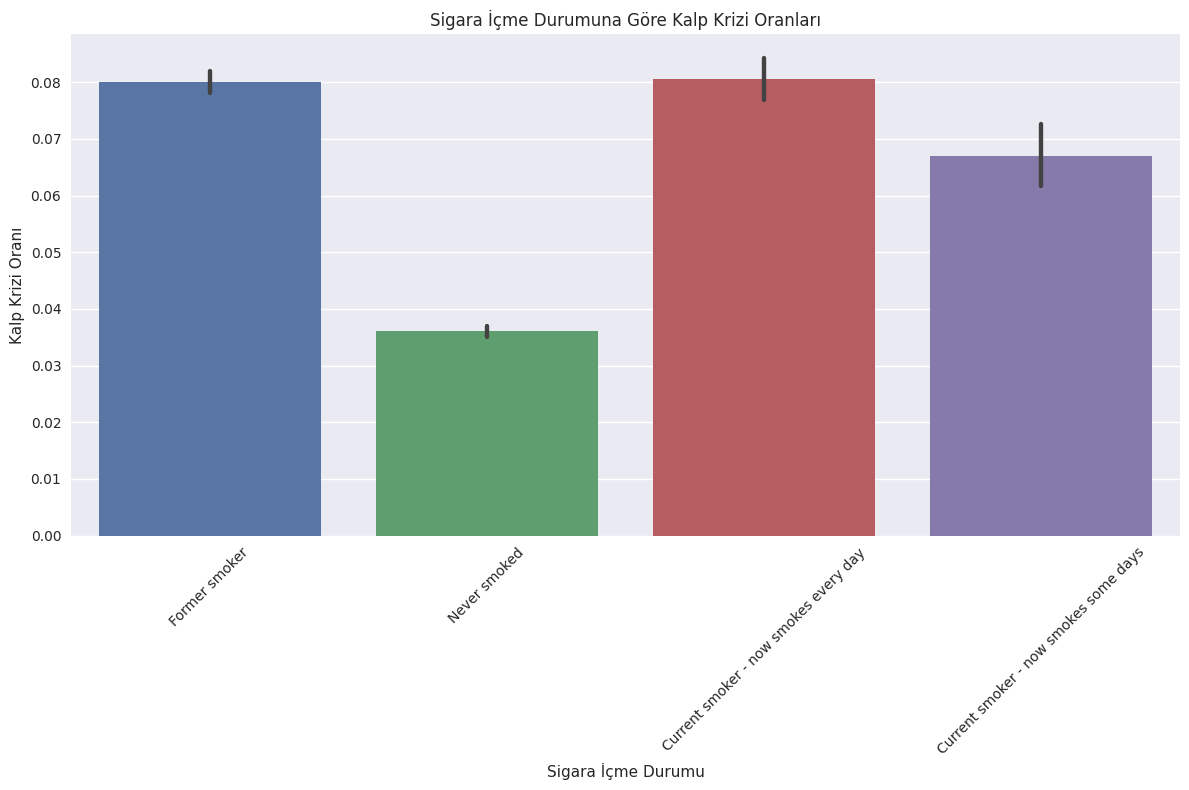

In [210]:
# Görselleştirme

plt.figure(figsize=(12, 8))

# Barplot a uygulayalım 

sns.barplot(data=df_fillna, x='SmokerStatus', y='HadHeartAttack_num')
plt.title('Sigara İçme Durumuna Göre Kalp Krizi Oranları')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Kalp Krizi Oranı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [211]:
# Risk oranlarını hesaplayalım

base_risk = smoker_heart_pct.loc['Never smoked', 1]
print("\nHiç Sigara İçmeyenlere Göre Rölatif Risk:")
for status in smoker_heart_pct.index:
    if status != 'Never smoked':
        risk_ratio = smoker_heart_pct.loc[status, 1] / base_risk
        print(f"{status}: {risk_ratio:.2f} kat")


Hiç Sigara İçmeyenlere Göre Rölatif Risk:
Current smoker - now smokes every day: 2.24 kat
Current smoker - now smokes some days: 1.86 kat
Former smoker: 2.22 kat


Bu sonuçlar sigara içme durumunun kalp krizi riskini nasıl etkilediğini gösteriyor:

- Her gün sigara içenler: Hiç içmeyenlere göre 2.24 kat daha fazla risk
- Ara sıra sigara içenler: 1.86 kat daha fazla risk 
- Eski içiciler: 2.22 kat daha fazla risk

Yani en yüksek risk her gün sigara içenlerde, sonra eski içicilerde görülüyor.

In [212]:
# Bir diğer önemli kriterimiz 'BMI' olacaktır. 
# BMI verilerini inceliyip kategorize edelim

df_fillna['BMI'].value_counts()

BMI
26.63    2642
27.46    1986
27.44    1910
24.41    1872
27.12    1832
         ... 
20.59       1
51.85       1
78.88       1
41.62       1
45.28       1
Name: count, Length: 3493, dtype: int64

In [213]:
# Vücut kilte endeksini kendi içinde gerçek kategorilere ayıralım

df_fillna['BMI_Category'] = pd.cut(df_fillna['BMI'], 
                                  bins=[0, 18.5, 24.9, 29.9, float('inf')],
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


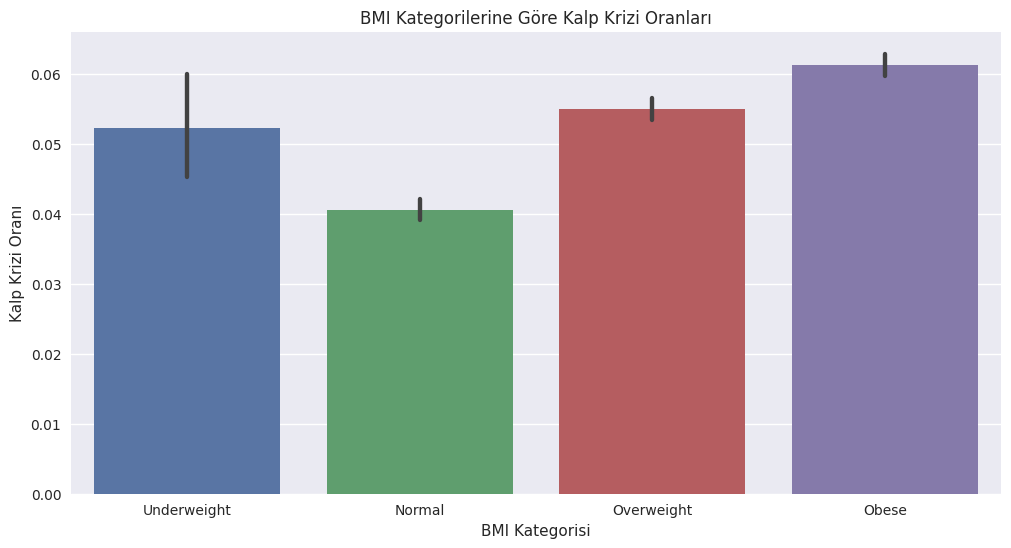

In [214]:
# BMI kategorilerine göre kalp krizi oranları

plt.figure(figsize=(12, 6))
sns.barplot(data=df_fillna, x='BMI_Category', y='HadHeartAttack_num')
plt.title('BMI Kategorilerine Göre Kalp Krizi Oranları')
plt.xlabel('BMI Kategorisi')
plt.ylabel('Kalp Krizi Oranı')
plt.show()

# 13. Aykırı Değer Analizi



### Aykırı değerleri tespit etmek için IQR (Interquartile Range) yöntemi kullanabiliriz


In [215]:
df = df_.copy()

In [218]:
# BMI için aykırı değer analizi yapalım, tek bir fonksiyon ile seçeceğimiz bir kolonunu analizini sağlayabiliriz

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    print(f"Aykırı Değer İstatistikleri - {column}")
    print("-" * 50)
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Alt Sınır: {lower_bound:.2f}")
    print(f"Üst Sınır: {upper_bound:.2f}")
    print(f"Aykırı Değer Sayısı: {len(outliers)}")
    print(f"Aykırı Değer Yüzdesi: {(len(outliers)/len(df))*100:.2f}%")
    
    return lower_bound, upper_bound, outliers

In [219]:
# Aykırı değerleri tespit edelim

lower_bound, upper_bound, outliers = detect_outliers(df_fillna, 'BMI')

Aykırı Değer İstatistikleri - BMI
--------------------------------------------------
Q1 (25%): 24.25
Q3 (75%): 31.89
IQR: 7.64
Alt Sınır: 12.79
Üst Sınır: 43.35
Aykırı Değer Sayısı: 7313
Aykırı Değer Yüzdesi: 2.97%


Text(0.5, 0, 'BMI')

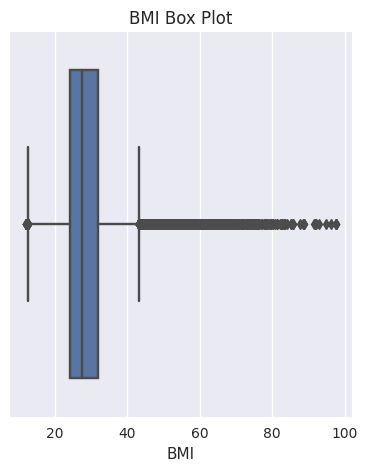

In [220]:
# Görselle açıklayalım(box-plot)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df_fillna['BMI'])
plt.title('BMI Box Plot')
plt.xlabel('BMI')

In [221]:
# Aykırı değerleri silelim

df_no_outliers = df_fillna.copy() # orjinal veri setinin kopyasını oluşturalım

df_no_outliers = df_no_outliers[(df_no_outliers['BMI'] >= lower_bound) & (df_no_outliers['BMI'] <= upper_bound)]

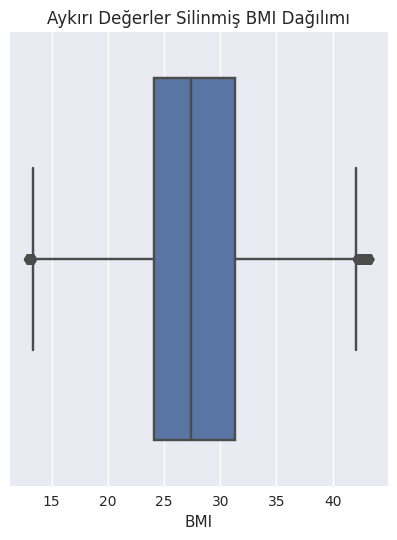

In [222]:
# Aykırı değerler silinmiş veri seti dağılımı

plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['BMI'])
plt.title('Aykırı Değerler Silinmiş BMI Dağılımı')
plt.xlabel('BMI')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'BMI')

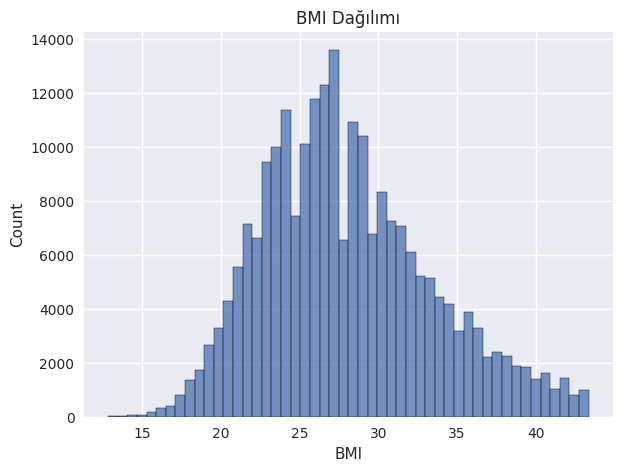

In [223]:
# Histogram

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_no_outliers['BMI'], bins=50)
plt.title('BMI Dağılımı')
plt.xlabel('BMI')

In [224]:
df_fillna['BMI_Category'] = pd.cut(df_fillna['BMI'], 
                                  bins=[0, 18.5, 24.9, 29.9, float('inf')],
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

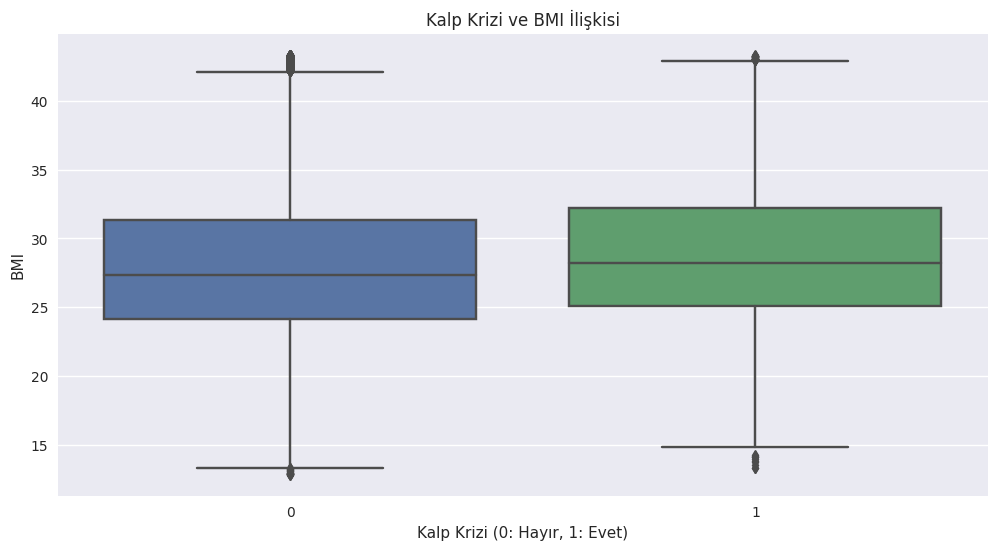

In [225]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='HadHeartAttack_num', y='BMI')
plt.title('Kalp Krizi ve BMI İlişkisi')
plt.xlabel('Kalp Krizi (0: Hayır, 1: Evet)')
plt.ylabel('BMI')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Kalp Krizi Oranı')

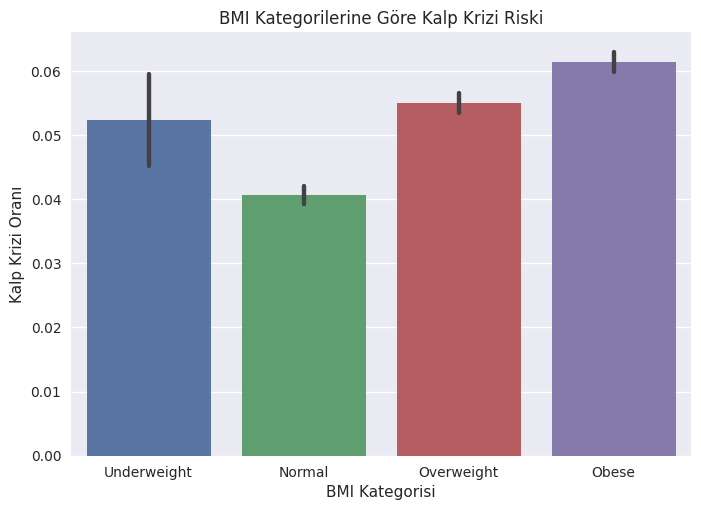

In [226]:
sns.barplot(data=df_fillna, x='BMI_Category', y='HadHeartAttack_num', 
           order=['Underweight', 'Normal', 'Overweight', 'Obese'])

plt.title('BMI Kategorilerine Göre Kalp Krizi Riski')
plt.xlabel('BMI Kategorisi')
plt.ylabel('Kalp Krizi Oranı')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


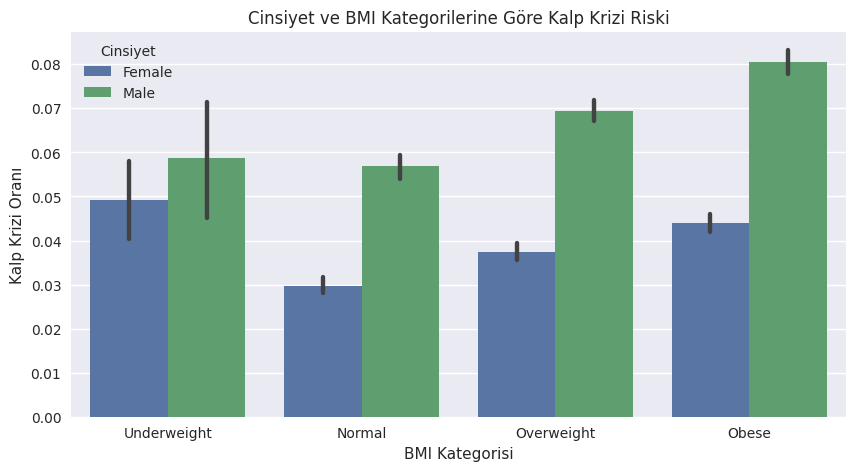

In [227]:
plt.figure(figsize=(10, 5))

# Cinsiyet ve BMI kategorilerine göre kalp krizi riskini görselleştirme
sns.barplot(data=df_fillna, x='BMI_Category', y='HadHeartAttack_num', hue='Sex',
           order=['Underweight', 'Normal', 'Overweight', 'Obese'])

plt.title('Cinsiyet ve BMI Kategorilerine Göre Kalp Krizi Riski')
plt.xlabel('BMI Kategorisi')
plt.ylabel('Kalp Krizi Oranı')
plt.legend(title='Cinsiyet')

/tmp/ipykernel_30/3595548331.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(data=df_fillna.pivot_table(values='HadHeartAttack_num',


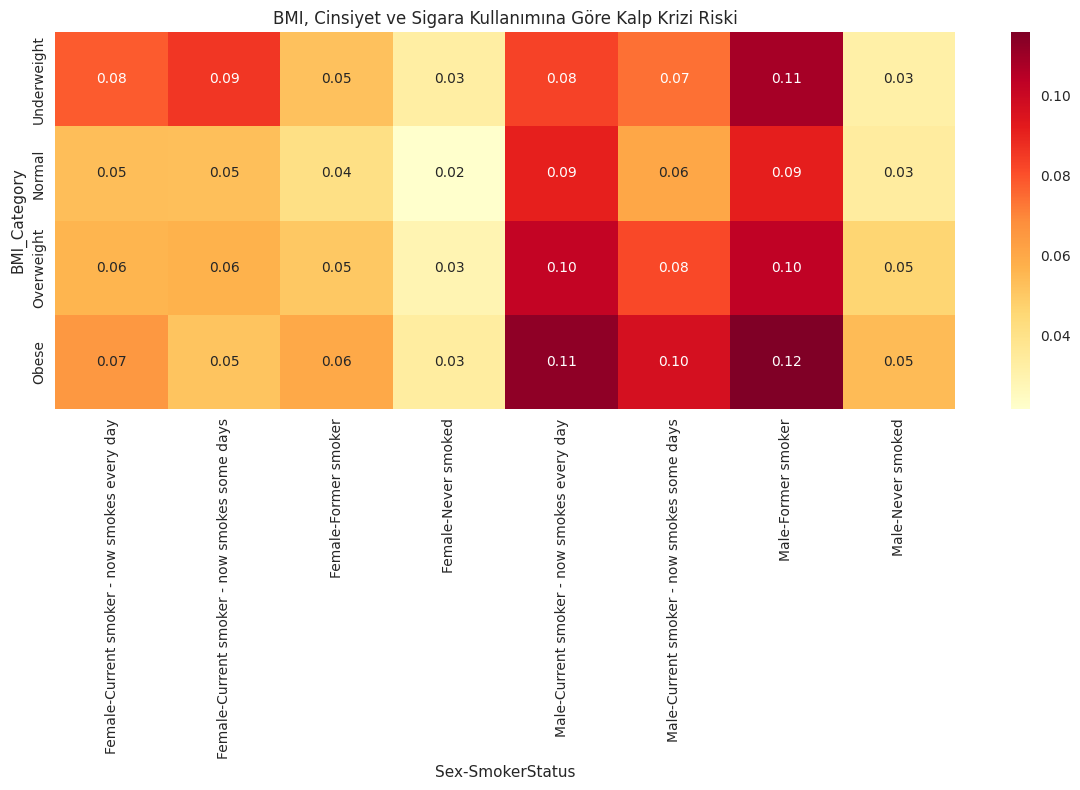

In [228]:
# BMI, sigara içme durumu, cinsiyet ile kalp krizi riski arasındaki analiz için heatmap yapalım

plt.figure(figsize=(12, 8))
sns.heatmap(data=df_fillna.pivot_table(values='HadHeartAttack_num', 
                                     index='BMI_Category',
                                     columns=['Sex', 'SmokerStatus'],
                                     aggfunc='mean'),
           annot=True, 
           fmt='.2f',
           cmap='YlOrRd')
plt.title('BMI, Cinsiyet ve Sigara Kullanımına Göre Kalp Krizi Riski')
plt.tight_layout()
plt.show()

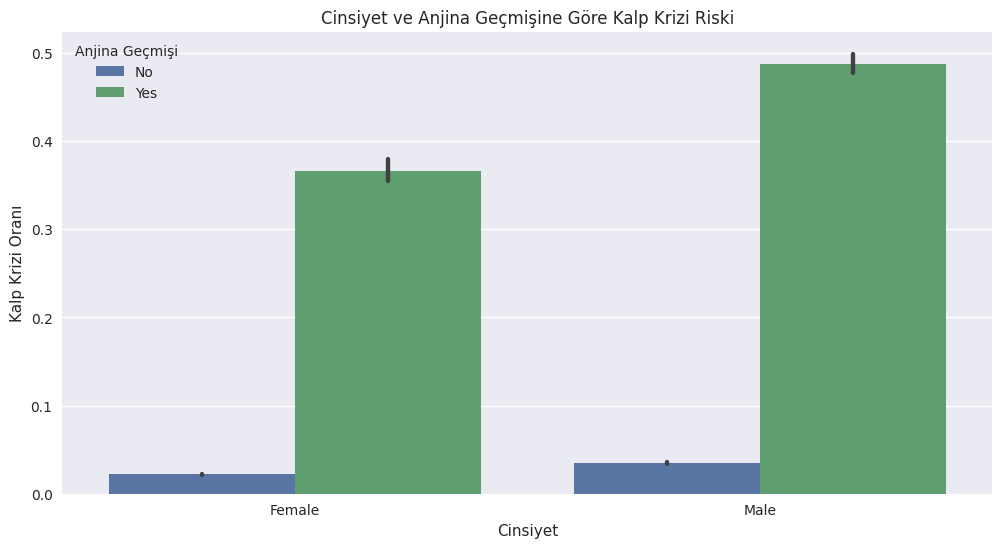

In [229]:
# daha önce angina(göğüs ağrısı kriz) geçirip geçirmediğine göre analiz yapalım

plt.figure(figsize=(12, 6))
sns.barplot(data=df_fillna, 
           x='Sex', 
           y='HadHeartAttack_num', 
           hue='HadAngina')

plt.title('Cinsiyet ve Anjina Geçmişine Göre Kalp Krizi Riski')
plt.xlabel('Cinsiyet')
plt.ylabel('Kalp Krizi Oranı')
plt.legend(title='Anjina Geçmişi')

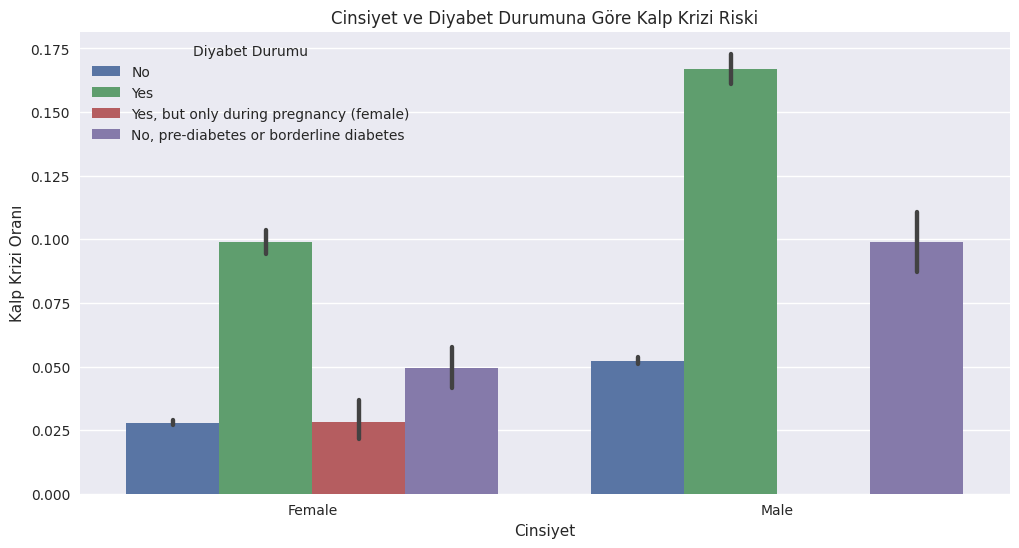

In [230]:
# diyabet hikayesine göre kalp krizi analizi

plt.figure(figsize=(12, 6))
sns.barplot(data=df_fillna, 
           x='Sex', 
           y='HadHeartAttack_num', 
           hue='HadDiabetes')

plt.title('Cinsiyet ve Diyabet Durumuna Göre Kalp Krizi Riski')
plt.xlabel('Cinsiyet')
plt.ylabel('Kalp Krizi Oranı')
plt.legend(title='Diyabet Durumu')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

<Figure size 1500x800 with 0 Axes>

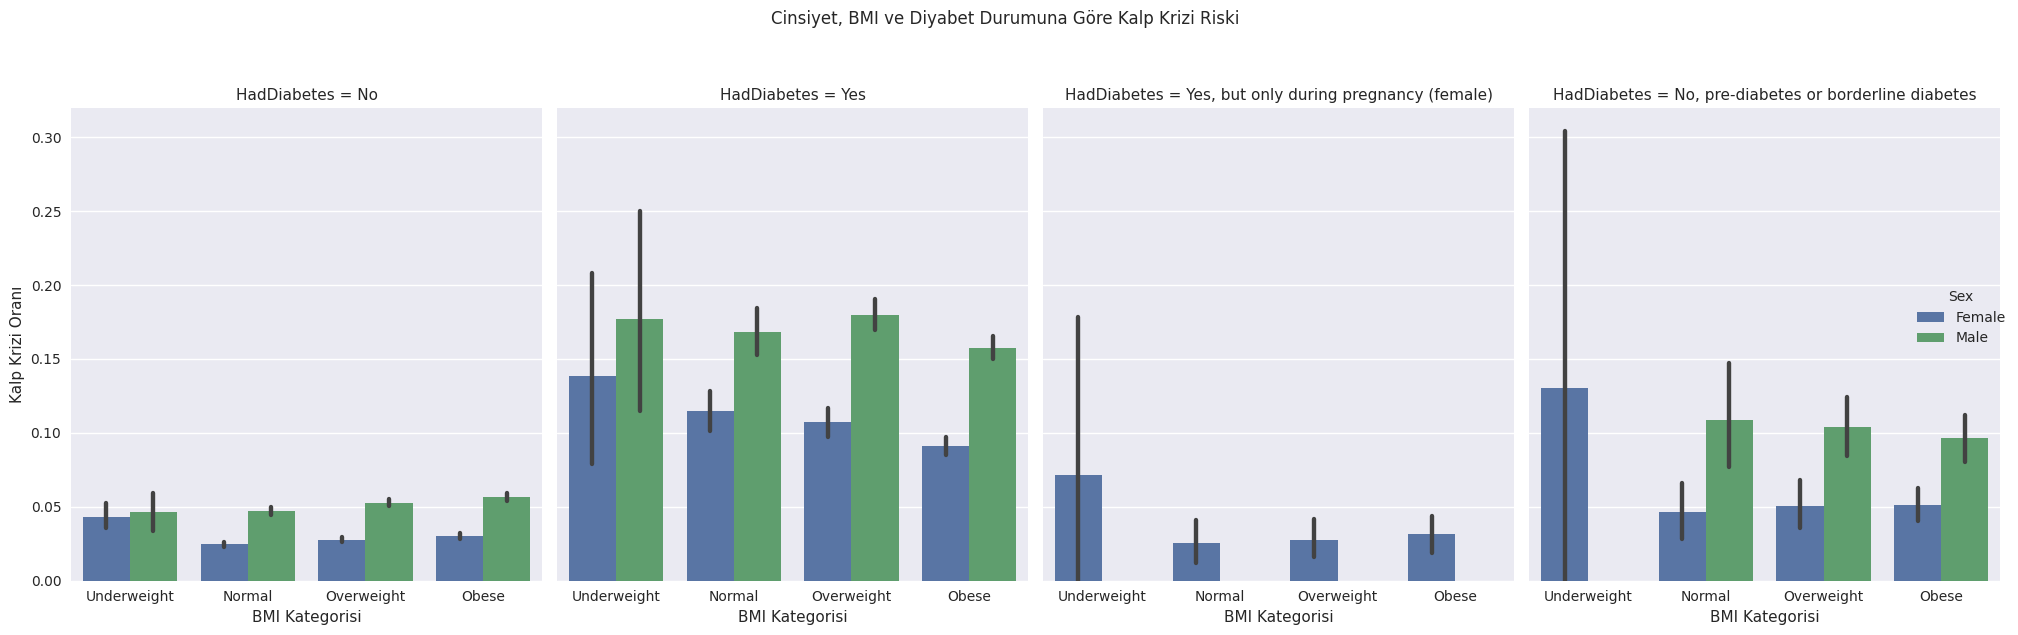

In [231]:
# BMI, diyabet öyküsü ve cinsiyete göre analiz grafiği yapalım


plt.figure(figsize=(15, 8))
g = sns.catplot(data=df_fillna, 
               x='BMI_Category', 
               y='HadHeartAttack_num', 
               hue='Sex',
               col='HadDiabetes',
               kind='bar',
               order=['Underweight', 'Normal', 'Overweight', 'Obese'],
               height=6, 
               aspect=0.8)

g.fig.suptitle('Cinsiyet, BMI ve Diyabet Durumuna Göre Kalp Krizi Riski', y=1.05)
g.set_axis_labels('BMI Kategorisi', 'Kalp Krizi Oranı')
plt.tight_layout()

# 14. Sürekli Değişken Analizi

In [232]:
# Sürekli değişkenleri bulalım

numeric_columns = df_fillna.select_dtypes(include=['int64', 'float64']).columns

print("Veri Setindeki Sürekli Değişkenler:")
print("-" * 30)
for i, col in enumerate(numeric_columns, 1):
    print(f"{i}. {col}")

# Her değişkenin benzersiz değer sayısını görelim

print("\nDeğişkenlerin Benzersiz Değer Sayıları:")
print("-" * 30)
for col in numeric_columns:
    unique_count = df_fillna[col].nunique()
    print(f"{col}: {unique_count} benzersiz değer")

Veri Setindeki Sürekli Değişkenler:
------------------------------
1. PhysicalHealthDays
2. MentalHealthDays
3. SleepHours
4. HeightInMeters
5. WeightInKilograms
6. BMI
7. HadHeartAttack_num

Değişkenlerin Benzersiz Değer Sayıları:
------------------------------
PhysicalHealthDays: 31 benzersiz değer
MentalHealthDays: 31 benzersiz değer
SleepHours: 23 benzersiz değer
HeightInMeters: 99 benzersiz değer
WeightInKilograms: 514 benzersiz değer
BMI: 3493 benzersiz değer
HadHeartAttack_num: 2 benzersiz değer


In [233]:
df_fillna['SleepHours'].value_counts().head()

SleepHours
7.0    74205
8.0    67886
6.0    52383
5.0    15946
9.0    11508
Name: count, dtype: int64

In [234]:
# Ortalama uyku sürelerinin dağılımı

print("Uyku Süresi Dağılım Analizi:")
print("-" * 40)
mean_sleep = df_fillna['SleepHours'].mean()
median_sleep = df_fillna['SleepHours'].median()
mode_sleep = df_fillna['SleepHours'].mode()[0]

print(f"Ortalama Uyku Süresi: {mean_sleep:.2f} saat")
print(f"Medyan Uyku Süresi: {median_sleep:.2f} saat")
print(f"En Sık Görülen Uyku Süresi: {mode_sleep:.2f} saat")
print(f"Standart Sapma: {df_fillna['SleepHours'].std():.2f} saat")


Uyku Süresi Dağılım Analizi:
----------------------------------------
Ortalama Uyku Süresi: 7.02 saat
Medyan Uyku Süresi: 7.00 saat
En Sık Görülen Uyku Süresi: 7.00 saat
Standart Sapma: 1.44 saat


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


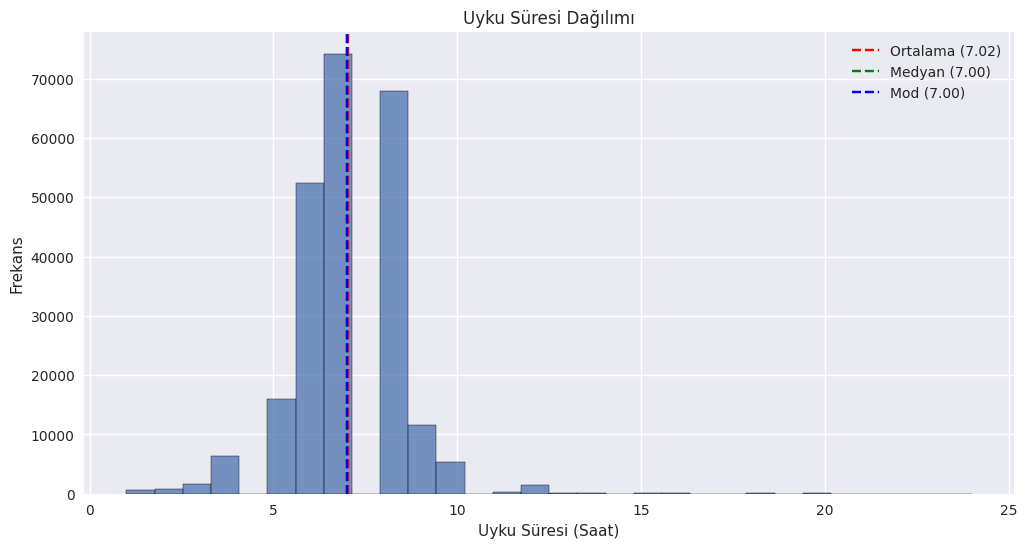

In [235]:
# Dağılım grafiği

plt.figure(figsize=(12, 6))
sns.histplot(data=df_fillna, x='SleepHours', bins=30)
plt.axvline(mean_sleep, color='red', linestyle='--', label=f'Ortalama ({mean_sleep:.2f})')
plt.axvline(median_sleep, color='green', linestyle='--', label=f'Medyan ({median_sleep:.2f})')
plt.axvline(mode_sleep, color='blue', linestyle='--', label=f'Mod ({mode_sleep:.2f})')
plt.title('Uyku Süresi Dağılımı')
plt.xlabel('Uyku Süresi (Saat)')
plt.ylabel('Frekans')
plt.legend()
plt.show()


In [236]:
# Uyku süresi grupları oluşturalım

df_fillna['SleepGroup'] = pd.cut(df_fillna['SleepHours'], 
                                bins=[0, 4, 6, 8, 10, 24],
                                labels=['0-4 saat', '4-6 saat', '6-8 saat', '8-10 saat', '10+ saat'])

# Gruplara göre kalp krizi oranları

sleep_heart = df_fillna.groupby('SleepGroup')['HadHeartAttack_num'].agg(['mean', 'count'])
sleep_heart['mean'] = sleep_heart['mean'] * 100
sleep_heart.columns = ['Kalp Krizi Oranı (%)', 'Kişi Sayısı']

/tmp/ipykernel_30/2139964771.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_heart = df_fillna.groupby('SleepGroup')['HadHeartAttack_num'].agg(['mean', 'count'])


In [237]:
print("\nUyku Gruplarına Göre Kalp Krizi Oranları:")
print(sleep_heart.round(2))


Uyku Gruplarına Göre Kalp Krizi Oranları:
            Kalp Krizi Oranı (%)  Kişi Sayısı
SleepGroup                                   
0-4 saat                   10.62         9143
4-6 saat                    5.45        68329
6-8 saat                    4.49       142091
8-10 saat                   7.82        16832
10+ saat                   12.53         2443


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


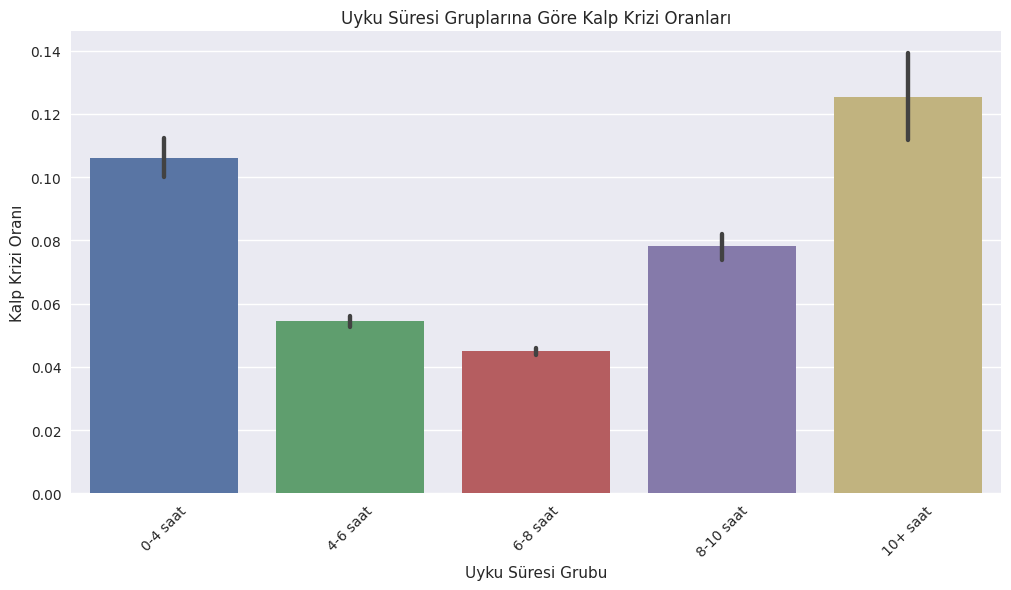

In [238]:
# Grafiğe dökelim

plt.figure(figsize=(12, 6))
sns.barplot(data=df_fillna, x='SleepGroup', y='HadHeartAttack_num')
plt.title('Uyku Süresi Gruplarına Göre Kalp Krizi Oranları')
plt.xlabel('Uyku Süresi Grubu')
plt.ylabel('Kalp Krizi Oranı')
plt.xticks(rotation=45)
plt.show()


# 15. Feature Engineering

### Risk Kategorileri oluşturabiliriz

In [239]:
# BMI Risk Kategorileri

def bmi_risk_category(bmi):
    if bmi < 16.5: return 'Severely Underweight'
    elif bmi < 18.5: return 'Underweight'
    elif bmi < 25: return 'Normal'
    elif bmi < 30: return 'Overweight'
    elif bmi < 35: return 'Obese Class I'
    elif bmi < 40: return 'Obese Class II'
    else: return 'Obese Class III'

df_fillna['BMI_Risk'] = df_fillna['BMI'].apply(bmi_risk_category)

print("BMI Risk Kategorileri Dağılımı:")

print(df_fillna['BMI_Risk'].value_counts())


BMI Risk Kategorileri Dağılımı:
BMI_Risk
Overweight              84858
Normal                  68364
Obese Class I           47687
Obese Class III         21172
Obese Class II          20298
Underweight              2890
Severely Underweight      753
Name: count, dtype: int64


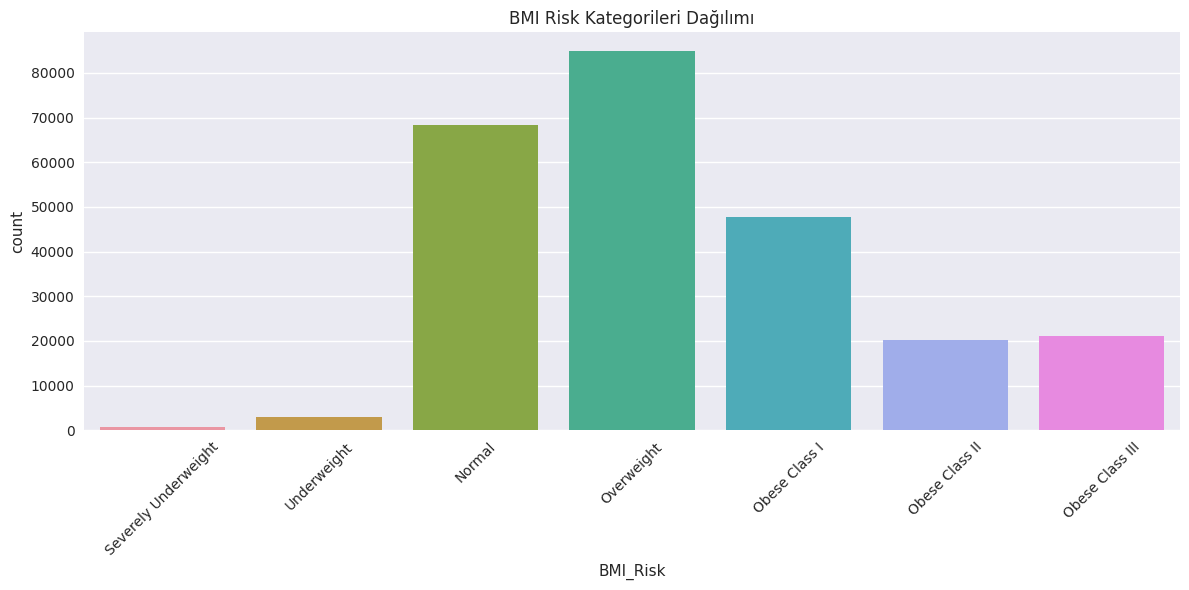

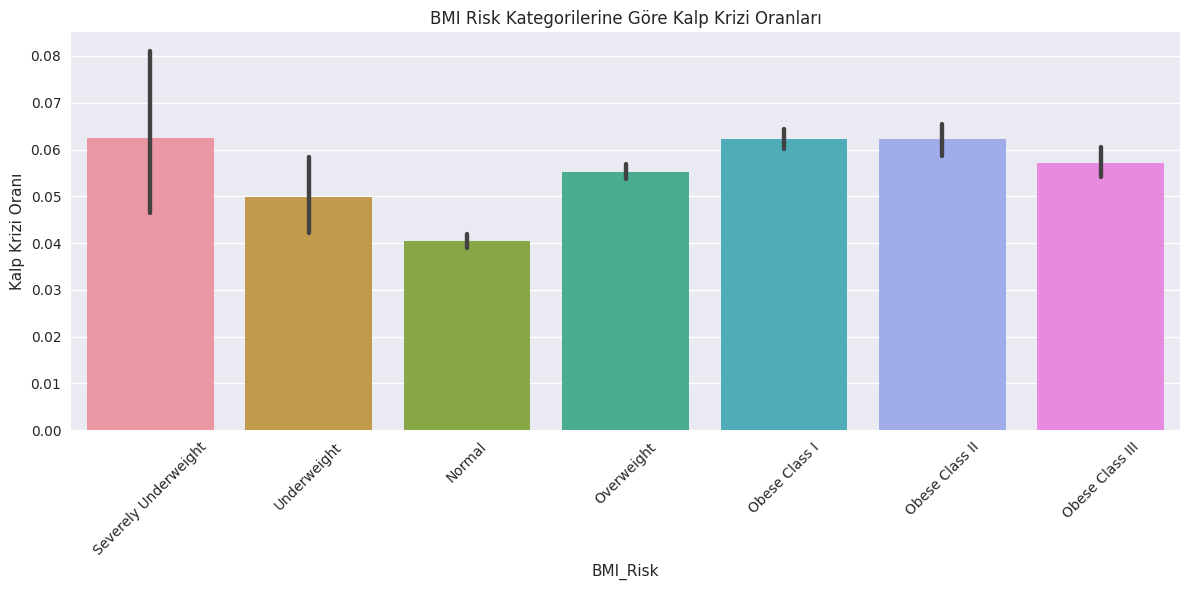

In [240]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_fillna, x='BMI_Risk', 
              order=['Severely Underweight', 'Underweight', 'Normal', 
                     'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'])
plt.title('BMI Risk Kategorileri Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# BMI Risk kategorilerine göre kalp krizi oranları

plt.figure(figsize=(12, 6))
sns.barplot(data=df_fillna, x='BMI_Risk', y='HadHeartAttack_num',
            order=['Severely Underweight', 'Underweight', 'Normal', 
                   'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'])
plt.title('BMI Risk Kategorilerine Göre Kalp Krizi Oranları')
plt.xticks(rotation=45)
plt.ylabel('Kalp Krizi Oranı')
plt.tight_layout()
plt.show()


In [241]:
# Uyku Kategorileri

def sleep_category(hours):
   if hours < 6: return 'Az Uyku'
   elif hours < 9: return 'Normal Uyku'
   else: return 'Fazla Uyku'

df_fillna['Sleep_Category'] = df_fillna['SleepHours'].apply(sleep_category)

# Sağlık Günleri Risk Grupları

def health_risk(days):
   if days <= 7: return 'Düşük Risk'
   elif days <= 14: return 'Orta Risk'
   else: return 'Yüksek Risk'

df_fillna['Physical_Health_Risk'] = df_fillna['PhysicalHealthDays'].apply(health_risk)
df_fillna['Mental_Health_Risk'] = df_fillna['MentalHealthDays'].apply(health_risk)

# Kronik Hastalık Sayısı

chronic_conditions = ['HadAngina', 'HadDiabetes', 'HadStroke', 'HadAsthma', 
                    'HadKidneyDisease', 'HadArthritis', 'HadCOPD']

df_fillna['Chronic_Disease_Count'] = df_fillna[chronic_conditions].apply(
   lambda x: sum(x == 'Yes'), axis=1)



# Risk Skoru hesaplayalım

def calculate_risk_score(row):
   score = 0
    
   # BMI riski
    
   if row['BMI'] >= 30: score += 2
   elif row['BMI'] >= 25: score += 1
   
   # Kronik hastalık riski
    
   score += row['Chronic_Disease_Count']
   
   # Sağlık günleri riski
    
   if row['PhysicalHealthDays'] > 14: score += 2
   if row['MentalHealthDays'] > 14: score += 1
   
   return score

df_fillna['Risk_Score'] = df_fillna.apply(calculate_risk_score, axis=1)

# Sonuçlar

print("Risk Skoru Dağılımı:")
print(df_fillna['Risk_Score'].describe().T)

Risk Skoru Dağılımı:
count    246022.000000
mean          2.179968
std           1.781078
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          12.000000
Name: Risk_Score, dtype: float64


In [243]:
# Uyku kategorilerine göre kalp krizi riski
sleep_risk = df_fillna.groupby('Sleep_Category')['HadHeartAttack_num'].mean()
print("\nUyku Kategorilerine Göre Kalp Krizi Oranları:")
print(sleep_risk)

normal_sleep = sleep_risk['Normal Uyku']
az_uyku = sleep_risk['Az Uyku']
fazla_uyku = sleep_risk['Fazla Uyku']

# Yüzde artış hesaplama
az_uyku_artis = ((az_uyku - normal_sleep) / normal_sleep) * 100
fazla_uyku_artis = ((fazla_uyku - normal_sleep) / normal_sleep) * 100

print(f"\nAz uyku (6 saatten az) riski %{az_uyku_artis:.2f} artırıyor")
print(f"Fazla uyku (9 saatten fazla) riski %{fazla_uyku_artis:.2f} artırıyor")


Uyku Kategorilerine Göre Kalp Krizi Oranları:
Sleep_Category
Az Uyku        0.080314
Fazla Uyku     0.076156
Normal Uyku    0.046587
Name: HadHeartAttack_num, dtype: float64

Az uyku (6 saatten az) riski %72.40 artırıyor
Fazla uyku (9 saatten fazla) riski %63.47 artırıyor


/tmp/ipykernel_30/3070435813.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


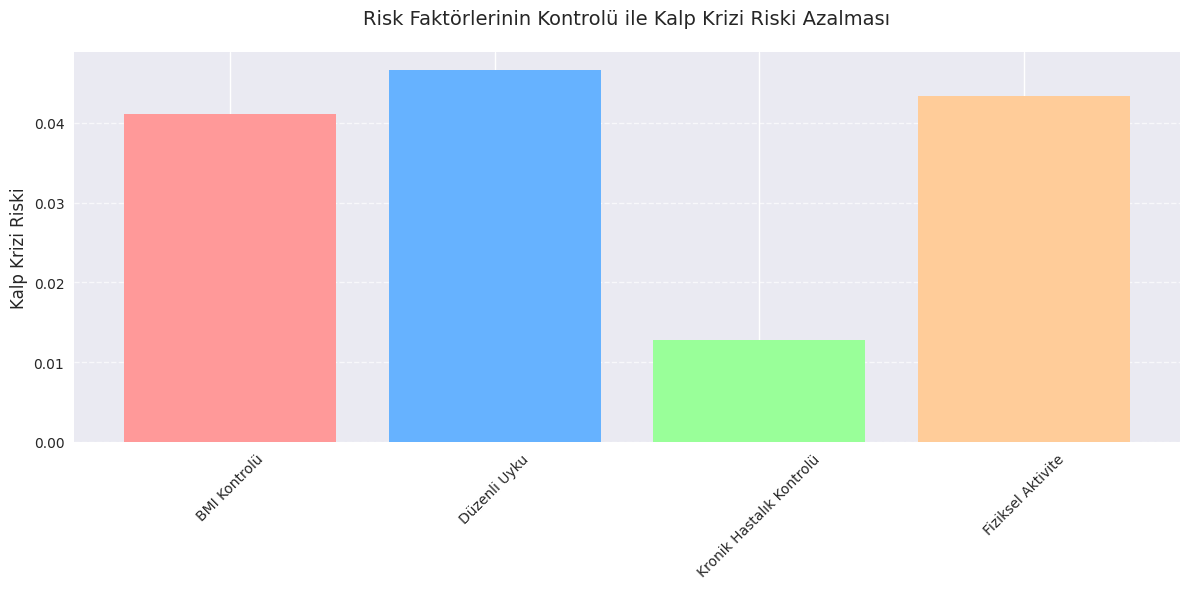


Risk Faktörlerinin Kalp Krizi Riskini Azaltma Oranları:
BMI Kontrolü: %95.89 azalma
Düzenli Uyku: %95.34 azalma
Kronik Hastalık Kontrolü: %98.72 azalma
Fiziksel Aktivite: %95.66 azalma


In [242]:
plt.figure(figsize=(12, 6))

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
risk_factors = {
   'BMI Kontrolü': df_fillna[df_fillna['BMI'] < 25]['HadHeartAttack_num'].mean(),
   'Düzenli Uyku': df_fillna[df_fillna['Sleep_Category'] == 'Normal Uyku']['HadHeartAttack_num'].mean(),
   'Kronik Hastalık Kontrolü': df_fillna[df_fillna['Chronic_Disease_Count'] == 0]['HadHeartAttack_num'].mean(),
   'Fiziksel Aktivite': df_fillna[df_fillna['PhysicalActivities'] == 'Yes']['HadHeartAttack_num'].mean()
}

plt.bar(risk_factors.keys(), risk_factors.values(), color=colors)
plt.title('Risk Faktörlerinin Kontrolü ile Kalp Krizi Riski Azalması', fontsize=14, pad=20)
plt.ylabel('Kalp Krizi Riski', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Çerçeve stili
plt.style.use('seaborn')
plt.tight_layout()
plt.show()

# Her faktörün risk azaltma oranını gösterelim

print("\nRisk Faktörlerinin Kalp Krizi Riskini Azaltma Oranları:")

for factor, value in risk_factors.items():
   print(f"{factor}: %{(1-value)*100:.2f} azalma")

# 16. Risk skorlarının analizi

1. BMI Kontrolü:
- Normal BMI'ya sahip kişilerde (25 altı) kalp krizi riski daha düşük
- Obezite (30 üzeri BMI) kalp krizi riskini önemli ölçüde artırıyor

2. Düzenli Uyku:
- Normal uyku düzeni (6-9 saat arası) kalp sağlığı için önemli
- Az veya çok uyku kalp krizi riskini artırıyor

3. Kronik Hastalık Kontrolü:
- Kronik hastalığı olmayanlarda kalp krizi riski daha düşük
- Her ek kronik hastalık riski artırıyor
- Özellikle diyabet, hipertansiyon ve anjin önemli risk faktörleri

4. Fiziksel Aktivite:
- Düzenli fiziksel aktivite yapanlarda kalp krizi riski azalıyor
- Hareketsiz yaşam riski artırıyor                                                                                                                       

## Öneriler
1. Düzenli CHECK-UP ve sağlık kontrolleri
2. Kilo kontrolü
3. Düzenli uyku düzeni
4. Fiziksel aktivite
5. Kronik hastalıkların takibi ve kontrolü



### Bir sağlık teknolojisi şirketi olarak, hastanelere ve kliniklere erken kalp hastalığı riski tespiti için bir karar destek sistemi geliştirmeyi hedefliyoruz. 

#### Bu sistem:

#### Birinci basamak sağlık hizmetlerinde kullanılabilir
#### Rutin kontrollerde toplanan temel sağlık verilerine dayanarak risk değerlendirmesi yapabilir
#### Yüksek riskli hastaların erken tespit edilmesini sağlayabilir

### İş Değeri:

#### Hastaneler için erken teşhis maliyetleri düşürür
#### Hastaların yaşam kalitesini artırır
#### Sağlık sisteminde önleyici tedbirlere odaklanmayı sağlar
#### Acil vakaların azalmasıyla hastane kaynaklarının daha verimli kullanımı

# 17. ML Model Önerisi


1. Birincil Model (Risk Sınıflandırma):
- Gradient Boosting algoritmaları (XGBoost veya LightGBM)
- Tercih Sebepleri:
  * Kategorik ve sayısal değişkenleri iyi işler
  * Eksik verilerle başa çıkabilir
  * Yüksek performans ve yorumlanabilirlik sunar
  * Feature importance analizi sağlar
  * Overfitting'e karşı dayanıklıdır

2. İkincil Model (Risk Seviyesi Tahmini):
- Neural Network (Yapay Sinir Ağları)
- Tercih Sebepleri:
  * Karmaşık ilişkileri öğrenebilir
  * Probability scores üretebilir
  * Online learning ile sürekli güncellenebilir
  * Farklı veri türlerini birleştirebilir

Öneriler:

1. Veri Toplama ve Hazırlık:
- Mevcut veri setinde eksik olan önemli vital bulgular eklenebilir
- Yaş grupları için daha detaylı kategoriler oluşturulabilir
- Aile geçmişi bilgisi eklenebilir

2. Model Geliştirme:
- Cross-validation ile model güvenilirliği test edilmeli
- Feature engineering ile yeni özellikler türetilmeli
- Modelin açıklanabilirliği için SHAP değerleri kullanılmalı

3. Sistem Entegrasyonu:
- Hastane sistemlerine entegre edilebilir API geliştirilmeli
- Gerçek zamanlı risk skorlaması yapılabilmeli
- Doktorlar için kullanıcı dostu arayüz tasarlanmalı

4. Validasyon ve İzleme:
- Farklı hasta gruplarında model performansı izlenmeli
- Düzenli model güncellemeleri planlanmalı
- False positive/negative oranları takip edilmeli

İleriki Aşamalar için Öneriler:
1. Pilot uygulama ile birkaç hastanede test edilmesi
2. Geri bildirimlerle sistemin iyileştirilmesi
3. Düzenli model performans değerlendirmesi
4. Yeni özellikler ve veri kaynakları eklenmesi

Bu yaklaşım, hem teknik açıdan güçlü hem de pratik uygulamada değer yaratacak bir çözüm sunacaktır. Özellikle gradient boosting ve yapay sinir ağlarının kombinasyonu, hem yüksek doğruluk hem de esneklik sağlayacaktır.